# Imports

In [68]:
import numpy as np
import pandas as pd
from collections import Counter

# Constants

In [91]:
NANS_PERC = 0
UNIQUE_MIN = 10

# Load Data

In [61]:
def load_data() -> pd.Series:
    csv = pd.read_csv('train.txt', sep=" ")
    percentage0 = round(len(csv[csv["class"]==0])/len(csv)*100,2)
    percentage1 = round(len(csv[csv["class"]==1])/len(csv)*100,2)
    print(f"class0: {percentage0}%,\tclass1: {percentage1}%")
    return csv
csv = load_data()

class0: 92.67%,	class1: 7.33%


# Defines

In [92]:
def nans_ctr() -> pd.Series:
    # Find those where nans is over nans_perc
    nans = csv.isna().sum()
    nans = nans[nans >= NANS_PERC*len(csv)]
    # print(nans[nans >= nans_perc*len(csv)])
    # print(nans.index.values)
    # csv = csv.drop(nans.index.values, axis=1)
    print(nans.head(5))
    return nans
nans = nans_ctr()

Var1    39431
Var2    39031
Var3    39032
Var4    38738
Var5    38797
dtype: int64


In [66]:
def unique_ctr() -> pd.Series():
    unique = pd.Series()
    for col in list(csv):
    #     len(csv[col].unique().astype(int))
    #     print(f"col {col}\t unique: {len(csv[col].unique())}")
        unique.at[col] = len(csv[col].unique())
    print(unique.head(5))
    return unique
unique = unique_ctr()

Var1     18
Var2      3
Var3    129
Var4      5
Var5    464
dtype: int64


In [67]:
def val_types() -> pd.Series():
    val_type = pd.Series()
    for col in list(csv):
        if csv[col].dtype == np.float64:
            val_type.at[col] = np.float64
        elif csv[col].dtype == np.int64:
            val_type.at[col] = np.int64
        elif csv[col].dtype == object:
            val_type.at[col] = object
        else:
            print("dupa")
    print(f"float: {sum(val_type == np.float64)}")
    print(f"int: {sum(val_type == np.int64)}")
    print(f"string: {sum(val_type == object)}")
    return val_type
val_type = val_types()

float: 191
int: 2
string: 38


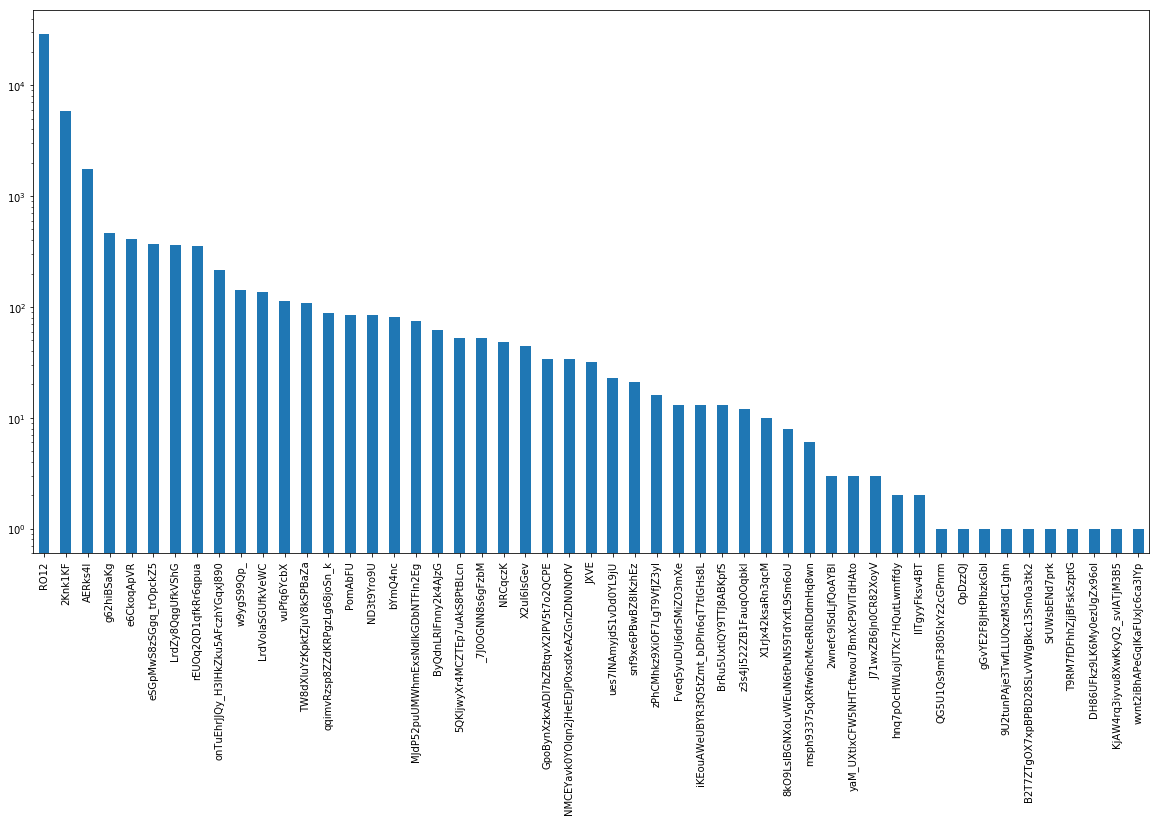

In [144]:
def plot(data, sort=False, log=True):
    letter_counts = Counter(data)
    df = pd.DataFrame.from_dict(letter_counts, orient='index')
    if sort:
        df.sort_values(by=0, ascending=False).plot(kind='bar', logy = log, figsize=(20,10), legend=False)
    else:
        df.plot(kind='bar', logy = True, figsize=(20,10), legend=False)
plot(csv['Var193'], sort=True)

# Factorize

In [8]:
for col in csv_1:
    if unique[col] < UNIQUE_MIN:
        csv_1[col] = csv_1[col].fillna(-1)
        labels, levels = pd.factorize(csv_1[col])
#         np.set_printoptions(threshold=4000)
#         csv_1[col] = labels.map(levels)
#         print(csv_1[col])
#         df.apply(lambda x: pd.Categorical(x, levels).codes)
        print(labels)
        print(levels)
        break

[0 0 0 ... 0 0 0]
Float64Index([-1.0, 0.0, 5.0], dtype='float64')


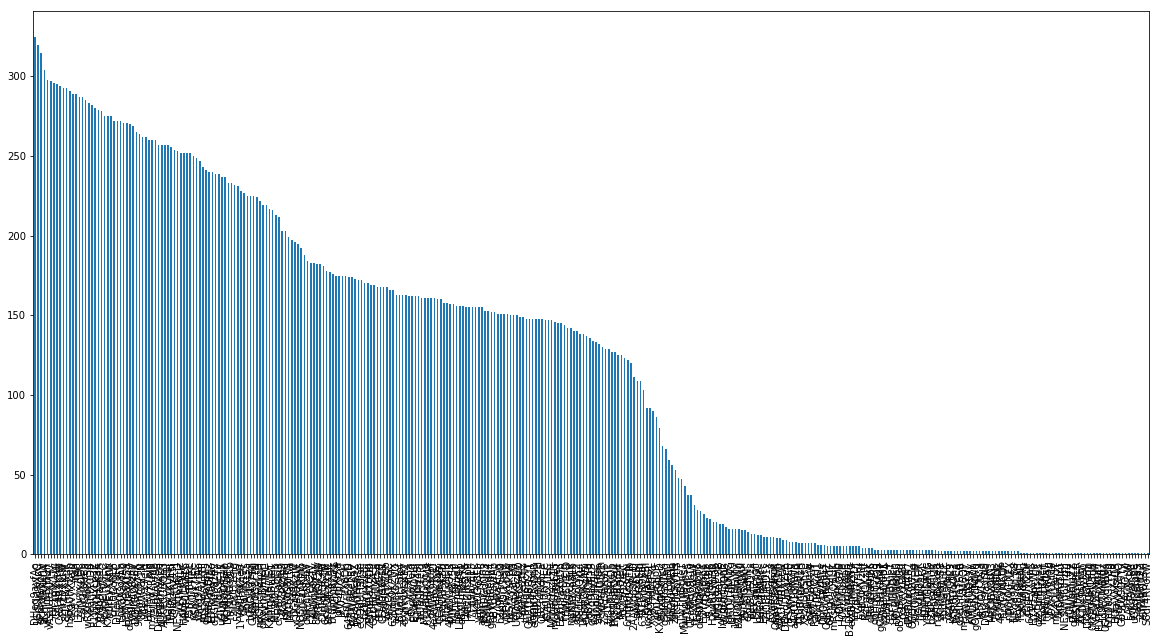

In [145]:
plot(csv['Var192'],sort=True, log=False)

# Correlation

In [140]:
cols = val_type[val_type == np.float64].index
# print(cols)
# corel_csv = csv[cols]
# for col in cols:
#     corel_csv[col] =
print(nans[nans == 0].index)
print(val_type[val_type == np.float64].index)
# cols = cols[nans == 0]
# print(cols)
np.corrcoef([csv[i] for i in cols[0:10]])

Var1      False
Var2      False
Var3      False
Var4      False
Var5      False
Var6      False
Var7      False
Var8      False
Var9      False
Var10     False
Var11     False
Var12     False
Var13     False
Var14     False
Var15     False
Var16     False
Var17     False
Var18     False
Var19     False
Var20     False
Var21     False
Var22     False
Var23     False
Var24     False
Var25     False
Var26     False
Var27     False
Var28     False
Var29     False
Var30     False
          ...  
Var202    False
Var203    False
Var204     True
Var205    False
Var206    False
Var207     True
Var208    False
Var209    False
Var210     True
Var211     True
Var212     True
Var213    False
Var214    False
Var215    False
Var216     True
Var217    False
Var218    False
Var219    False
Var220     True
Var221     True
Var222     True
Var223    False
Var224    False
Var225    False
Var226     True
Var227     True
Var228     True
Var229    False
Var230    False
class      True
Length: 231, dtype: bool

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

In [120]:
nans[nans == 0].index

Index(['Var57', 'Var73', 'Var113', 'Var193', 'Var195', 'Var196', 'Var198',
       'Var204', 'Var207', 'Var210', 'Var211', 'Var212', 'Var216', 'Var220',
       'Var221', 'Var222', 'Var226', 'Var227', 'Var228', 'class'],
      dtype='object')

In [27]:
cols = ['StudentID', 'Homework', 'Midterm', 'Project']  # We don't want to convert the Final grade column.
for col in cols:  # Iterate over chosen columns
	grades[col] = pd.to_numeric(grades[col])

NameError: name 'grades' is not defined

In [18]:
data = csv.values
np.unique(data[~np.isnan(data)])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''